In [47]:
# !pip install -r requirements.txt

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

시드값 고정

In [49]:
import os
import random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(100) # Seed 고정

데이터 로드

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/dt_21.csv',
                 header=None)
x,y = df.iloc[:,:-1], df.iloc[:,-1]

In [51]:
class0 = np.array(x[y == 0])
class1 = np.array(x[y == 1])

입력데이터 시각화

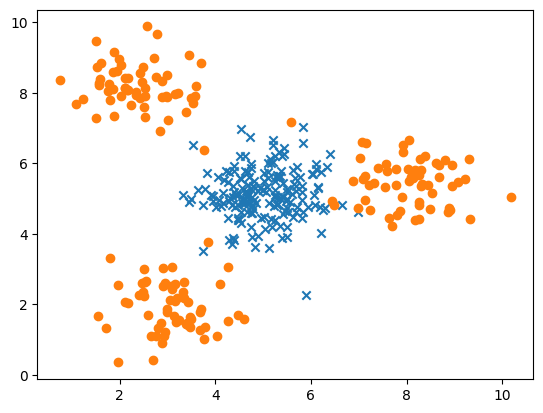

In [52]:
plt.scatter(class0[:,0],class0[:,1], marker='x')
plt.scatter(class1[:,0],class1[:,1], marker='o')
plt.show()


데이터 분할

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

모델 선택

In [54]:
params = {'random_state':100,'max_depth':4}
dtc = DecisionTreeClassifier(**params)   # 키워드 매개변수  VS *변수명
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=100)

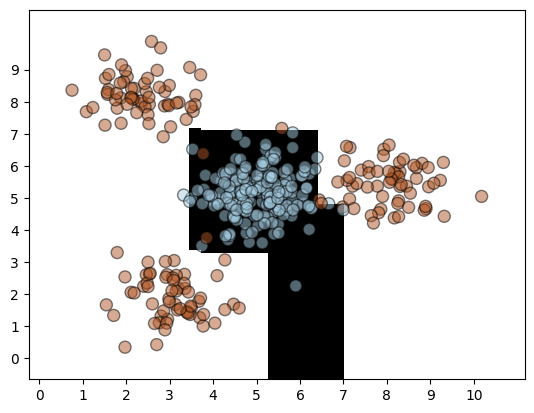

In [99]:
# 결정 경계 시각화
def classify_visualization(classifier, X, y, title=''):
    # X와 Y의 최소 및 최대값을 정의합니다.
    # 이 값들은 메쉬 그리드(mesh grid)에 사용됩니다.
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # 플로팅할 메쉬 그리드의 스텝 크기를 정의합니다.
    mesh_step_size = 0.01

    # X와 Y 값의 메쉬 그리드를 정의합니다.
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # 메쉬 그리드 상에서 분류기를 실행합니다.
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # 출력 배열의 형태를 재조정합니다.
    output = output.reshape(x_vals.shape)

    # 플롯을 생성합니다.
    plt.figure()

    # 제목을 지정합니다.
    plt.title(title)

    # 플롯에 대한 컬러 스킴을 선택합니다.
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # 플롯 상에 학습 데이터 포인트를 오버레이합니다.
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired, alpha=0.5)

    # 플롯의 경계를 지정합니다.
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # X축과 Y축의 눈금을 지정합니다.
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

classify_visualization(dtc, df.iloc[:,:-1].to_numpy(), df.iloc[:,-1].to_numpy())

성능평가

In [58]:
print(classification_report(y_train, dtc.predict(x_train),target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.98      1.00      0.99       140
      class1       1.00      0.98      0.99       148

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



In [59]:
print(classification_report(y_test, dtc.predict(x_test),target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       1.00      0.97      0.99        40
      class1       0.97      1.00      0.98        32

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



In [60]:
dtc.score(x_test,y_test) # accuracy

0.9861111111111112

앙상블 학습
  - 여러모델을 구축한다음, 각 모델이 개별적으로 생성하는 것보다 더 낳은 결과를 생성하도록 결합



1.   랜덤 포레스트
  - 과적합 되지 않는다(다양한 무작위 집합을 사용)
  - 트리를 구성하는 동안 노드가 연속적으로 분할 각 레벨에서 엔트로피를 줄이려는 최선의 임계값을 선택
2.   익스트림 랜덤 포레스트
  - 무작위로 데이터를 선택하고 임계값도 무작위로 선택
  - 확장성이 좋고 병렬화 작업에 더 알맞은 모델




모델 선택

In [61]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [62]:
# !python parameter_test.py --classifier-type rf

In [63]:
path = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/randomforest_21.csv'
random_df = pd.read_csv(path,header=None)

In [64]:
random_df[2].value_counts()

0    300
1    300
2    300
Name: 2, dtype: int64

클래스를 분류하고 시각화

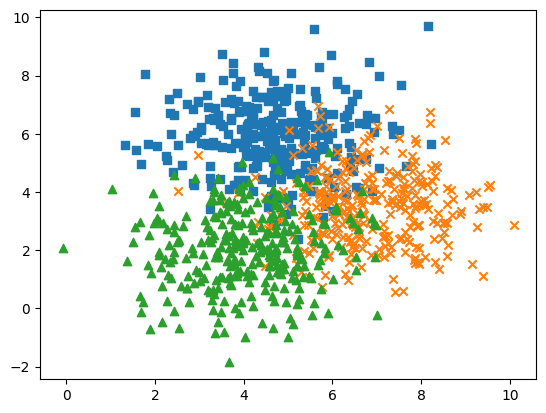

In [65]:
x,y = random_df.iloc[:,:-1], random_df.iloc[:,-1]
class0 = np.array(x[y==0])
class1 = np.array(x[y==1])
class2 = np.array(x[y==2])

plt.scatter(class0[:,0],class0[:,1], marker='s')
plt.scatter(class1[:,0],class1[:,1], marker='x')
plt.scatter(class2[:,0],class2[:,1], marker='^')
plt.show()

훈련용 검증용 데이터 분할

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100)

모델 선택 및 훈련

In [67]:
params = {
    'n_estimators' : 100, 'max_depth':4, 'random_state':0
}
rfc = RandomForestClassifier(**params)
etc = ExtraTreesClassifier(**params)

In [68]:
rfc.fit(x_train,y_train)
etc.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=4, random_state=0)

훈련 결과에 대한 시각화

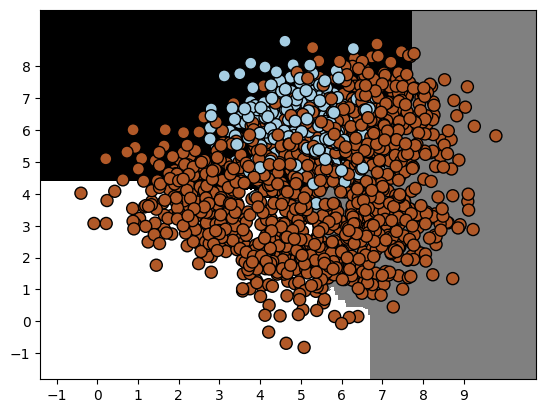

In [92]:
classify_visualization(rfc,x,y)

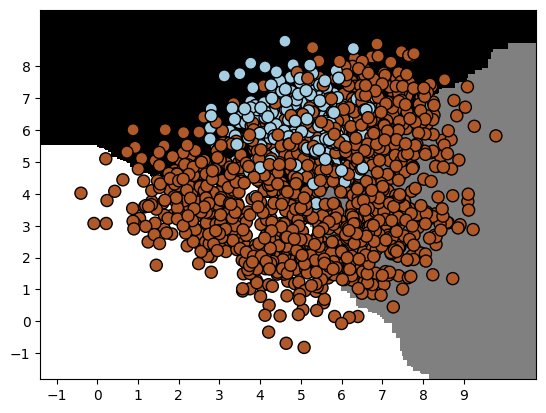

In [93]:
classify_visualization(etc,x,y)

분류기 성능 평가

In [74]:
print(classification_report(y_train, rfc.predict(x_train),target_names=['class0','class1','class2']))

              precision    recall  f1-score   support

      class0       0.89      0.89      0.89       227
      class1       0.83      0.84      0.84       222
      class2       0.87      0.86      0.86       226

    accuracy                           0.86       675
   macro avg       0.86      0.86      0.86       675
weighted avg       0.86      0.86      0.86       675



In [75]:
print(classification_report(y_train, etc.predict(x_train),target_names=['class0','class1','class2']))

              precision    recall  f1-score   support

      class0       0.88      0.85      0.86       227
      class1       0.82      0.82      0.82       222
      class2       0.84      0.87      0.86       226

    accuracy                           0.85       675
   macro avg       0.85      0.85      0.85       675
weighted avg       0.85      0.85      0.85       675



클래스 불균형

데이터 로드

In [82]:
path = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/invalance_21.csv'
invalance_df = pd.read_csv(path,header=None)
x,y = invalance_df.iloc[:,:-1].to_numpy(), invalance_df.iloc[:,-1].to_numpy()
# 클래스분할
np.unique(y)

array([0, 1])

In [83]:
class0 = x[y==0]
class1 = x[y==1]

시각화 

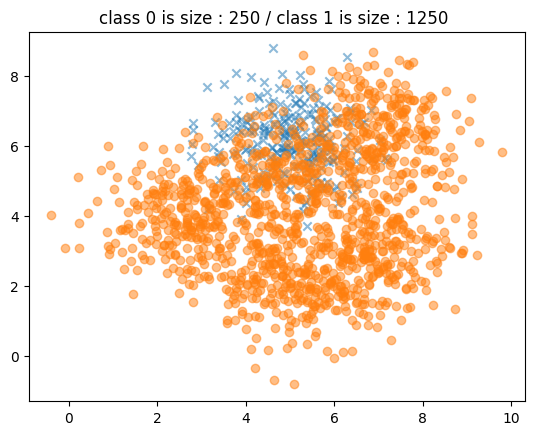

In [89]:
plt.scatter(class0[:,0],class0[:,1],marker='x',alpha=0.5)
plt.scatter(class1[:,0],class1[:,1],marker='o',alpha=0.5)
plt.title(f'class 0 is size : {len(class0)} / class 1 is size : {len(class1)} ')
plt.show()

데이터 분할

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100)

데이터 불균형을 처리하지 않을때

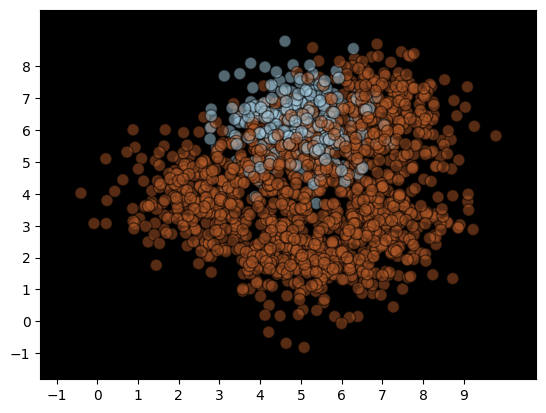

In [103]:
params = {
    'n_estimators':100,'max_depth':4,'random_state':0,
    # 'class_weight':'balanced'
}
etc = ExtraTreesClassifier(**params)
etc.fit(x_train,y_train)
classify_visualization(etc,x,y)

In [104]:
print(classification_report(y_train, etc.predict(x_train),target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.00      0.00      0.00       189
      class1       0.83      1.00      0.91       936

    accuracy                           0.83      1125
   macro avg       0.42      0.50      0.45      1125
weighted avg       0.69      0.83      0.76      1125



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


클래스 불균형 처리

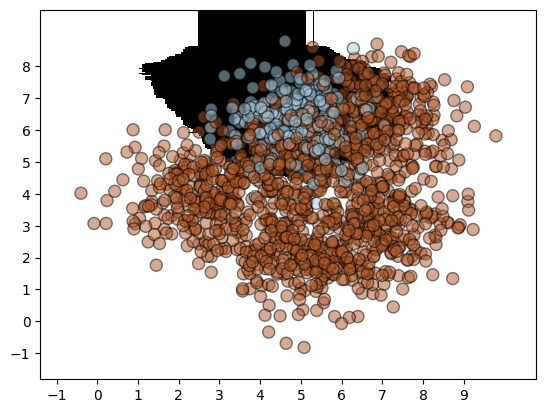

In [105]:
params = {
    'n_estimators':100,'max_depth':4,'random_state':0,
     'class_weight':'balanced'
}
etc = ExtraTreesClassifier(**params)
etc.fit(x_train,y_train)
classify_visualization(etc,x,y)

In [106]:
print(classification_report(y_train, etc.predict(x_train),target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.44      0.93      0.60       189
      class1       0.98      0.76      0.86       936

    accuracy                           0.79      1125
   macro avg       0.71      0.84      0.73      1125
weighted avg       0.89      0.79      0.81      1125



클래스 불균형을 머신러닝 모델에서 자체 해결하는 게 아니라 데이터 를 변형해서 처리
  - under sampling : 일부데이터만 추출
  - over sampling : 작은 클래스의 데이터를 복사 또는 합성해서 개수를 늘려서 맞춤
  - Weighting(가중치): 작은 클래스에 가중치를 높게 부여
  - Ensemble(앙상블) : 모델을 여러개 결합
    - 다수클래스에 언더셈플링을 하고 다수와 소스 클래스들을 오버셈클링해서 두 모델을 결합

In [113]:
from imblearn.under_sampling import RandomUnderSampler
rate = 0.5  # undersampling 비율
under_sampler = RandomUnderSampler(sampling_strategy=rate)
x_us, y_us = under_sampler.fit_resample(x,y)
len(y), len(y_us), np.unique(y_us,return_counts=True), np.unique(y,return_counts=True)

(1500,
 750,
 (array([0, 1]), array([250, 500])),
 (array([0, 1]), array([ 250, 1250])))

In [114]:
from imblearn.over_sampling import RandomOverSampler
rate = 0.5  # undersampling 비율
over_sampler = RandomOverSampler(sampling_strategy=rate)
x_os, y_os = over_sampler.fit_resample(x,y)
len(y), len(y_os), np.unique(y_os,return_counts=True), np.unique(y,return_counts=True)

(1500,
 1875,
 (array([0, 1]), array([ 625, 1250])),
 (array([0, 1]), array([ 250, 1250])))

- 과제 - : 데이터불균형일때.. 가중치 조정방법과, 앙상블 기법에대해서 여기서 사용한 데이터를 이용
  - 두개의 각각 예제를 만들어서 확인해 볼것
  - chatGPT 이용 권장

모델을 이용한 불균형 문제를 어느정도 해소했고 모델선택이 완료..---> 하이퍼 파라메터 튜닝

In [116]:
from sklearn.model_selection import GridSearchCV

In [123]:
# 파라메터 설정
params = {
    'n_estimators' : [100,200,300,1000],
    'max_depth' : [2,4,6,8,10]
}

In [124]:
# 해당 파라메터를 그리드서치에 적용
balance_dtc = ExtraTreesClassifier(class_weight = 'balanced')
# 평가지표를 다양하게 적용
metrics = ['precision_weighted','recall_weighted']
scores = []
for metric in metrics:
  gsc = GridSearchCV(balance_dtc,param_grid = params, scoring=metric)  
  gsc.fit(x_train,y_train)
  scores.append(gsc)

In [140]:
scores[0].best_estimator_

ExtraTreesClassifier(class_weight='balanced', max_depth=8, n_estimators=1000)

In [141]:
scores[1].best_estimator_

ExtraTreesClassifier(class_weight='balanced', max_depth=10, n_estimators=200)

각각 하이퍼 튜닝한 두개의 모델을 가지고 앙상블

In [155]:
temp = np.array([scores[0].predict_proba(x_test),scores[1].predict_proba(x_test)])
temp_mean = np.mean(temp,axis=0)
np.argmax(temp_mean,axis=1)

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [156]:
print(classification_report(y_test, np.argmax(temp_mean,axis=1),target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.43      0.82      0.56        61
      class1       0.96      0.79      0.86       314

    accuracy                           0.79       375
   macro avg       0.69      0.80      0.71       375
weighted avg       0.87      0.79      0.81       375



N차원이 컬럼에서 특정 중요도(상대적) 계산
  - boosting 계열중 AdaBoost, 머신러닝의 성능을 향상시키기 위해 다른모델과 함께 자주 사용하는 모델
  - 투표시스템을 적용

In [177]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

데이터 로드

In [178]:
path = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/boston_housing_21.csv'

In [179]:
house_df = pd.read_csv(path)
house_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


데이터 분할

In [180]:
x_train,x_test,y_train,y_test = train_test_split(house_df.iloc[:,:-1], house_df.iloc[:,-1],random_state=100)

AdaBoost 모델

In [181]:
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100,random_state=100)
regressor.fit(x_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100, random_state=100)

MSE로 성능측정

In [182]:
from sklearn.metrics import mean_squared_error, explained_variance_score
y_test_pred = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)
mse, evs

(17.94482966049056, 0.8184415162677728)

특성 중요도 추출

In [184]:
feature_im = regressor.feature_importances_
feature_name = regressor.feature_names_in_
feature_name,feature_im

(array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object),
 array([0.03064111, 0.00176203, 0.00859936, 0.00123913, 0.04255315,
        0.31979199, 0.01903785, 0.11687531, 0.02068872, 0.07162557,
        0.02068192, 0.02032473, 0.32617911]))

In [192]:
# 시각화를 위해 정규화
feature_im = (feature_im / max(feature_im))*100
inx_sort = np.argsort(feature_im)[::-1]
feature_name[inx_sort], feature_im[inx_sort]

(array(['LSTAT', 'RM', 'DIS', 'TAX', 'NOX', 'CRIM', 'RAD', 'PTRATIO', 'B',
        'AGE', 'INDUS', 'ZN', 'CHAS'], dtype=object),
 array([100.        ,  98.04183722,  35.83163545,  21.95896807,
         13.04594713,   9.39395195,   6.34274911,   6.34066472,
          6.23115688,   5.83662459,   2.63639322,   0.54020385,
          0.37989268]))

<BarContainer object of 13 artists>

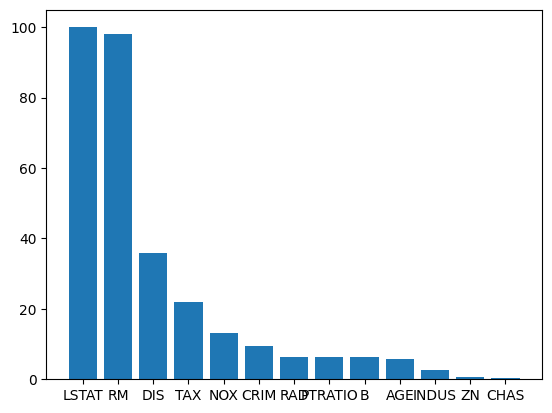

In [193]:
plt.bar(feature_name[inx_sort],feature_im[inx_sort])